8
x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


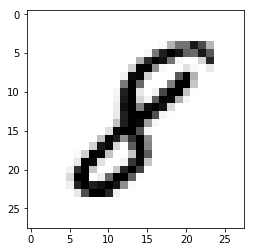

In [17]:
import numpy
# load data
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
#plot 1 random image 
import matplotlib.pyplot as plt
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8 (image at index 7777)
plt.imshow(x_train[image_index], cmap='Greys')

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) #6000x1 training samples, 28 rows, 28 col, 1 channel images (grayscale)  
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape)) # convolution on set of 28 images at once, 3x3 test matrix of convolution, input=28x28 
model.add(MaxPooling2D(pool_size=(2, 2)))# selects convolution feature map maxima at each 2x2
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers, coversion of 2D int 1D of 128
model.add(Dense(128, activation='relu')) # 128 neurons in hidden layer
model.add(Dropout(0.2)) #fight with the overfitting 
model.add(Dense(10,activation='softmax')) # 10 outputs after softmax activation function

In [18]:
#compile model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=4) # 10 iterations to update weights

Epoch 1/4
60000/60000 [==============================] - 48s 801us/step - loss: 0.2058 - acc: 0.9375
Epoch 2/4
60000/60000 [==============================] - 48s 805us/step - loss: 0.0822 - acc: 0.9750
Epoch 3/4
60000/60000 [==============================] - 48s 792us/step - loss: 0.0556 - acc: 0.9820
Epoch 4/4
60000/60000 [==============================] - 47s 791us/step - loss: 0.0418 - acc: 0.9861


4


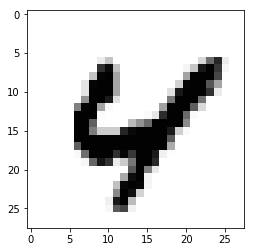

In [19]:
#prediction
image_index = 3444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())